<a href="https://colab.research.google.com/github/antopeza/Final-Project-Brainster/blob/main/NEW_code_PV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import os 

import re

import string
from string import punctuation


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import xgboost as xgb

import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer
from nltk.corpus import wordnet, stopwords
from nltk import pos_tag, word_tokenize

import gensim
from gensim.parsing.preprocessing import remove_stopwords

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential, load_model
from keras.layers import Input, Embedding, LSTM, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

from imblearn.over_sampling import SMOTE
from collections import Counter

#from scikeras.wrappers import KerasClassifier

import pickle
from pickle import dump
from pickle import load

from imblearn.over_sampling import SMOTE
from collections import Counter

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive 
drive.mount('/drive')

Mounted at /drive


In [4]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
stops = set(stopwords.words('english'))
#print(stops)

In [6]:
stemmer =  PorterStemmer()
lemmer = WordNetLemmatizer()

In [ ]:
# example
print(stemmer.stem('halves'))
print(lemmer.lemmatize('halves'))

In [7]:
#df_raw = pd.read_csv(path)
df_raw = pd.read_csv('/drive/My Drive/MACHINE LEARNING/FINAL PROJECT/train.csv')

In [8]:
print('shape of df  = ', df_raw.shape)
print()
df_raw.head(2)

shape of df  =  (404290, 6)



,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0


In [8]:
df_raw[df_raw.isnull().any(axis=1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [9]:
df_raw = df_raw.fillna("")
df_raw.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [10]:
# randomly selected samples from df for the new df to perform operations
df = df_raw.sample(3100)
df = df[['question1', 'question2', 'is_duplicate']]
print(df.shape)

(3100, 3)


In [96]:
df_copy = df.copy()

In [97]:
y = df['is_duplicate']
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:-1], 
                                                                y, stratify = y, test_size = 0.2, random_state = 0)

print("Whole dataset: ", len(df))
print("X_train size =", len(X_train))
print("X_split size =", len(X_test))
print("y_train size =", len(y_train))
print("y_split size =", len(y_test))

Whole dataset:  3100
X_train size = 2480
X_split size = 620
y_train size = 2480
y_split size = 620


In [98]:
y_train_df = pd.DataFrame(y_train, columns=['is_duplicate'])
X_train = X_train.join(y_train_df, lsuffix='_left', rsuffix='_right')
X_train

,question1,question2,is_duplicate
66080,Can you suggest a reputed US based SEO service...,Can anyone give me a review of the MSG . My Da...,0
24056,"What is a lucrative career for an introverted,...",What is a lucrative career for someone who is ...,1
139620,What's your zodiac sign?,Are you sensitive? What's your zodiac sign?,0
226122,How old would Jesus be today?,How old is Jesus?,1
32413,What are the principles of federalism?,What are fundamental ethical principles?,0
...,...,...,...
107150,How was the 2G scam caught?,If anybody want to expose a biggest scams in g...,0
130687,How do I remove personal information from atla...,How do I remove my personal information from t...,1
314943,How is convict conditionning?,What is Convict conditioning?,1
89163,Why don't human lay eggs?,How does a chicken lay an egg within another e...,0


In [99]:
y_test_df = pd.DataFrame(y_test, columns=['is_duplicate'])
X_test = X_test.join(y_test_df, lsuffix='_left', rsuffix='_right')
X_test

,question1,question2,is_duplicate
394442,Can you provide me the list of the best hollyw...,What are the best top 10 movies of Hollywood e...,1
206906,Which is the best book to refer to completely ...,Which is the best book for understanding Kali ...,1
200493,Where is the best place to register the .it do...,Where is the best place to register an .is dom...,0
375357,Why do trained falcons wear blinders?,How do falcons get rid from honey bees?,0
381392,How is the value of gold calculated?,What is the value of gold today?,0
...,...,...,...
215428,What is the best launcher for Android?,What is best launcher for Android?,1
383811,Can I use NFL player images and logos on my we...,Who will win Super Bowl 51?,0
134865,Which country is better to immigrate from India?,Which are the easiest developed countries to i...,0
35963,"What's the difference between Google AdWords, ...",How can I use Google AdWords?,0


In [37]:
def get_wordnet_pos(tag):
    if tag.startswith("N"):
        return wordnet.NOUN
    if tag.startswith("J"):
        return wordnet.ADJ
    if tag.startswith("V"):
        return wordnet.VERB
    if tag.startswith("R"):
        return wordnet.ADV
    return wordnet.NOUN

def clean_sentence(sentence, stopwords = False, lemmatize = False, stem = False):
    sentence = sentence.lower().strip()
    sentence = re.sub(r'[^a-z0-9\s]', '', sentence)  # removing all caracters that are not alpha numeric
    #sentence = re.sub(r'\s{2,}', ' ', sentence
   
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    
    if stopwords:
        sentence = remove_stopwords(sentence)  
        
    if lemmatize:
        nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
        wn_tagged = map(lambda x: (x[0], get_wordnet_pos(x[1])), nltk_tagged)
        res_words = []
        for word, tag in wn_tagged:
            if tag is None:
                res_words.append(word)
            else :
                res_words.append(lemmer.lemmatize(word, tag))
        sentence = " ".join(res_words)
        
    if stem:
        sent_stemmed = ''
        for word in sentence.split():
            sent_stemmed += ' '+ stemmer.stem(word)
        sentence = sent_stemmed
   
    return sentence

def get_cleaned_senteces(df, stopwords = False, lemmatize = False, stem = False):
    #sents1 = dfq[['question1']]  
    #sents2 = dfq[['question2']]
    cleaned_sentences1 = []
    cleaned_sentences2 = []
    
    for index, row in df.iterrows():
        # print (index, row)
        cleaned1 = clean_sentence(row['question1'], stopwords, lemmatize, stem) 
        cleaned2 = clean_sentence(row['question2'], stopwords, lemmatize, stem)

        cleaned_sentences1.append(cleaned1)
        cleaned_sentences2.append(cleaned2)
    return cleaned_sentences1, cleaned_sentences2

In [100]:
def to_df(q1cleaned, q2cleaned, df):
    '''cleaned sentences to df'''
    X_temp1 = pd.DataFrame()
    X_temp2 = pd.DataFrame()
    X_temp1['q1'] = pd.DataFrame(q1cleaned, index = df.index)
    X_temp2['q2'] = pd.DataFrame(q2cleaned, index = df.index)
    X_temp = pd.concat([X_temp1, X_temp2], axis = 1)
    X_temp['is_duplicate'] = df_raw['is_duplicate']
    return X_temp

In [101]:
#Train part 
# With stopwords lemmatized, not stemmed
q1_sw, q2_sw = get_cleaned_senteces(X_train, stopwords = False, lemmatize = True, stem = False)
assert len(q1_sw) == len(q2_sw)
X_sw_train = to_df(q1_sw, q2_sw, X_train)
X_sw_train.shape

(2480, 3)

In [102]:
#Test part
# With stopwords lemmatized, not stemmed
q1_sw, q2_sw = get_cleaned_senteces(X_test, stopwords = False, lemmatize = True, stem = False)
assert len(q1_sw) == len(q2_sw)
X_sw_test = to_df(q1_sw, q2_sw, X_test)
X_sw_test.shape

(620, 3)

In [42]:
X_sw_test[X_sw_test.isnull().any(axis=1)]

,q1,q2,is_duplicate


Value counts:
 0    1574
1     906
Name: is_duplicate, dtype: int64

Percent of labels value:
 0    63.467742
1    36.532258
Name: is_duplicate, dtype: float64


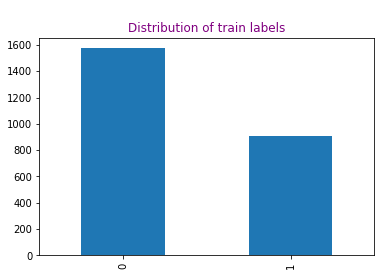

In [23]:
print('Value counts:\n', X_sw_train['is_duplicate'].value_counts())
print('\nPercent of labels value:\n', X_sw_train['is_duplicate'].value_counts()/X_sw_train['is_duplicate'].count()*100)
X_sw_train['is_duplicate'].value_counts().plot(kind = 'bar')
plt.title('\nDistribution of train labels', color = 'purple', size = 12)
plt.show()

Value counts:
 0    386
1    234
Name: is_duplicate, dtype: int64

Percent of labels value:
 0    62.258065
1    37.741935
Name: is_duplicate, dtype: float64


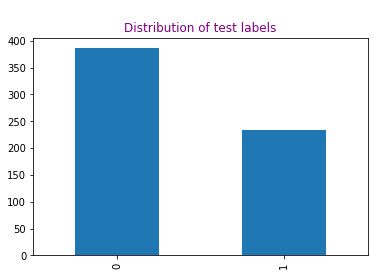

In [67]:
print('Value counts:\n', X_sw_test['is_duplicate'].value_counts())
print('\nPercent of labels value:\n', X_sw_test['is_duplicate'].value_counts()/X_sw_test['is_duplicate'].count()*100)
X_sw_test['is_duplicate'].value_counts().plot(kind = 'bar')
plt.title('\nDistribution of test labels', color = 'purple', size = 12)
plt.show()

In [43]:
display (X_sw_train.head(2))
display(X_sw_test.head(2))
display(df.head(2))

,q1,q2,is_duplicate
66080,can you suggest a reputed u base seo service c...,can anyone give me a review of the msg my dad ...,0
24056,what be a lucrative career for an introverted ...,what be a lucrative career for someone who be ...,1


,q1,q2,is_duplicate
394442,can you provide me the list of the best hollyw...,what be the best top 10 movie of hollywood ever,1
206906,which be the best book to refer to completely ...,which be the best book for understand kali linux,1


,question1,question2,is_duplicate
242243,How do I become a robotic engineer?,How do I become a robotics engineer?,1
344904,What is the best way to start learning C langu...,How should I start to learn c language?,1


In [44]:
#X_sw_test[X_sw_test.isnull().any(axis=1)]

# DOC2VEC

In [45]:
# Creating DataFrame for Evaluations
result_d2v = pd.DataFrame(columns = ['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'Log_loss'])
result_d2v.head()

,Model Name,Accuracy,Precision,Recall,F1_score,Log_loss


In [46]:
def res(model, acc, precision, recall, f1_score, log_loss):
    result_d2v.loc[len(result_d2v)]   = [model, acc, precision, recall, f1_score, log_loss]
    pd.set_option('display.max_rows', None)
    display (result_d2v)
    return result_d2v

In [103]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

X_sw_train_tag1 = [TaggedDocument(d, [i]) for i, d in enumerate(X_sw_train['q1'])]
X_sw_train_tag2 = [TaggedDocument(d, [i]) for i, d in enumerate(X_sw_train['q2'])]


In [104]:
X_sw_test_tag1 = [TaggedDocument(d, [i]) for i, d in enumerate(X_sw_test['q1'])]
X_sw_test_tag2 = [TaggedDocument(d, [i]) for i, d in enumerate(X_sw_test['q2'])]

In [105]:
X_train_tagged = X_sw_train_tag1 + X_sw_train_tag2
#X_train_tagged

X_test_tagged = X_sw_test_tag1 + X_sw_test_tag2


In [106]:
model_doc2vec = Doc2Vec(vector_size =20, window=2, min_count=1, epochs=50)

In [107]:
model_doc2vec.build_vocab(X_train_tagged)

In [108]:
model_doc2vec.train(X_train_tagged, total_examples=model_doc2vec.corpus_count, epochs=model_doc2vec.epochs)

In [109]:
print(model_doc2vec.infer_vector(X_sw_test))

[ 0.00553507 -0.02057612 -0.00601494  0.01590716  0.00477619 -0.00957217
 -0.01354616  0.01898067 -0.00717559  0.00853975  0.00150559 -0.01450056
 -0.00628278 -0.02179538 -0.01993607 -0.02084691  0.00312932 -0.0190215
 -0.00581192  0.01894295]


In [90]:
#TEST THE MODEL ON X_sw_test

test = model_doc2vec.infer_vector(X_sw_test)
model_doc2vec.docvecs.most_similar(positive = [test])
#positive = List of sentences that contribute positively.


[(1607, 0.3674626350402832),
 (1454, 0.3508557975292206),
 (1876, 0.3459669351577759),
 (2316, 0.3180397152900696),
 (1868, 0.31006860733032227),
 (389, 0.3054264485836029),
 (1438, 0.28425800800323486),
 (1760, 0.272051066160202),
 (2109, 0.2675776481628418),
 (2054, 0.2670101821422577)]

In [103]:
X_sw_train.iloc[2054]

q1              what be the best self help book you have read ...
q2                   what be the top self help book i should read
is_duplicate                                                    1
Name: 106969, dtype: object

In [53]:
print('Value counts - y_train:\n', y_train.value_counts())
#print('\nPercent of labels value - y_train:\n', y_train.value_counts()/y_train.count()*100)
print('Value counts - y_test:\n', y_test.value_counts())
#print('\nPercent of labels value - y_test:\n', y_test.value_counts()/y_test.count())

Value counts - y_train:
 is_duplicate
0               1574
1                906
dtype: int64
Value counts - y_test:
 is_duplicate
0               394
1               226
dtype: int64


# Models

In [64]:

from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import ShuffleSplit, HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [129]:
#copied from Pavlina
def rf_clf(X_train, X_test, y_train, y_test):
    '''Parameter tuning for Random Forest Classifier and model fit'''
    
    splits = ShuffleSplit(n_splits = 1, test_size = .2, random_state = 0)
    rf_param_grid = {'n_estimators':[200, 500, 800], 'min_samples_split':[5, 15], 'max_depth': [70, 150, None]}
    rf_clf = RandomForestClassifier(random_state = 0)
    
    rf_search = HalvingGridSearchCV(rf_clf, rf_param_grid, cv = splits, factor = 2, scoring = 'accuracy', 
                                        #max_resources = 40, aggressive_elimination = True,verbose = 0)
    rf_clf.fit(X_train, y_train)
    
    rf_model = rf_clf.best_estimator_
    
    y_pred = rf_model.predict(X_test)
    
    log_loss = metrics.log_loss(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    print (rf_model)
    #print('log loss', rf_loss_bow, '\nacc', rf_acc_bow)
    return accuracy, precision, recall, f1_score, log_loss, y_pred, rf_model  

In [130]:
acc_rf, precision_rf, recall_rf, f1_score_rf, log_loss_rf, y_pred_rf, berf  = rf_clf(X_train_tagged, X_test_tagged, y_train_cat, y_test_cat)

ValueError: ignored

In [120]:
type(X_train_tagged)

list

In [127]:
forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit(X_train_tagged, y_train)

ValueError: ignored

In [91]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

In [110]:
labels = preprocessing.LabelEncoder()
# Convert continous y values to categorical
y_train_cat= labels.fit_transform(y_train)
print(y_train_cat)

#y_val_cat = labels.fit_transform(y_val)
#print(y_val_cat)

y_test_cat = labels.fit_transform(y_test)
print(y_test_cat)

[0 1 0 ... 1 0 0]
[1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1
 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0
 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0
 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0
 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1
 0 1 1 